In [5]:
# === 1. Import library and read data ===
import pandas as pd

train_path = "/kaggle/input/telco-customer-churn-dataset/churn-bigml-80.csv"
test_path  = "/kaggle/input/telco-customer-churn-dataset/churn-bigml-20.csv"

df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

print("Train shape:", df_train.shape)
print("Test  shape:", df_test.shape)
df_train.head()


Train shape: (2666, 20)
Test  shape: (667, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# === 2. Cleaning and encoding ===
drop_cols = ["State"]
df_train = df_train.drop(columns=drop_cols)
df_test  = df_test.drop(columns=drop_cols)

df_train["Churn"] = df_train["Churn"].astype(int)
df_test["Churn"]  = df_test["Churn"].astype(int)

cat_cols = ["International plan", "Voice mail plan", "Area code"]
df_train = pd.get_dummies(df_train, columns=cat_cols, drop_first=True)
df_test  = pd.get_dummies(df_test,  columns=cat_cols, drop_first=True)
df_test  = df_test.reindex(columns=df_train.columns, fill_value=0)

print("After encoding:")
print("Train:", df_train.shape, "Test:", df_test.shape)


After encoding:
Train: (2666, 20) Test: (667, 20)


In [7]:
# === 2‑1 Overview of key features (descriptive statistics) ===
numeric_cols = [c for c in df_train.columns if df_train[c].dtype != "uint8" and c != "Churn"]
display(df_train[numeric_cols].describe().T)


,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00
Total night calls,2666.0,100.106152,19.418459,33.00,87.0000,100.00,113.000,166.00


Loss ratio:
Churn
0    0.854
1    0.146
Name: count, dtype: float64


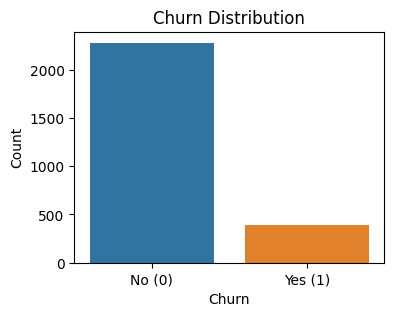

In [8]:
# === 2‑2 Churn rate visualization + class imbalance check ===
import matplotlib.pyplot as plt
import seaborn as sns

churn_counts = df_train["Churn"].value_counts()
print("Loss ratio:")
print((churn_counts / churn_counts.sum()).round(3))

plt.figure(figsize=(4,3))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.xticks([0,1], ["No (0)", "Yes (1)"])
plt.ylabel("Count")
plt.title("Churn Distribution")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

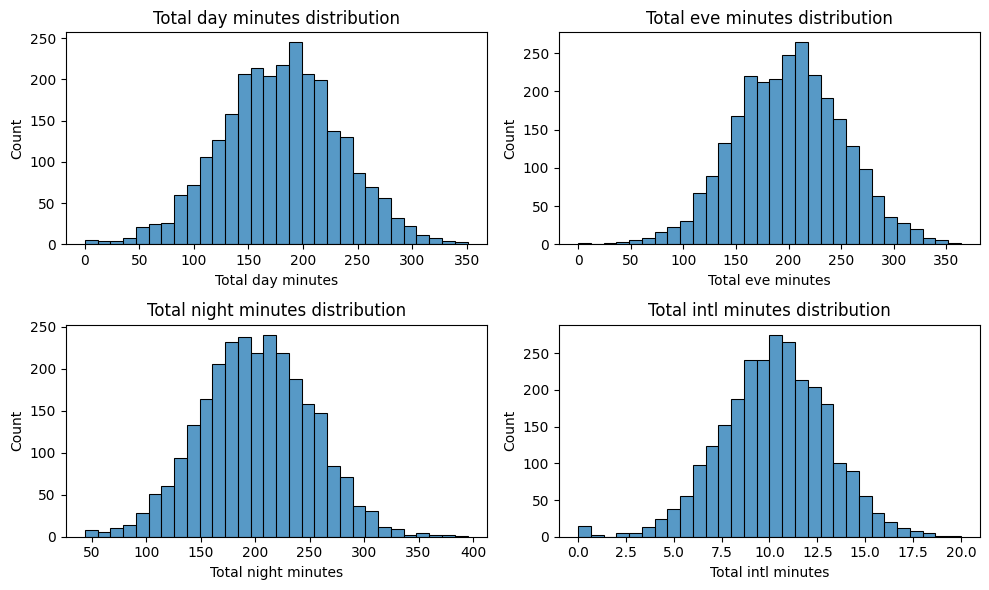

In [9]:
# === 2‑3 Distribution of main numerical features such as call duration ===
feature_list = [
    "Total day minutes", "Total eve minutes",
    "Total night minutes", "Total intl minutes"
]

fig, axes = plt.subplots(2, 2, figsize=(10,6))
axes = axes.flatten()

for ax, col in zip(axes, feature_list):
    sns.histplot(df_train[col], bins=30, ax=ax)
    ax.set_title(f"{col} distribution")
plt.tight_layout()
plt.show()


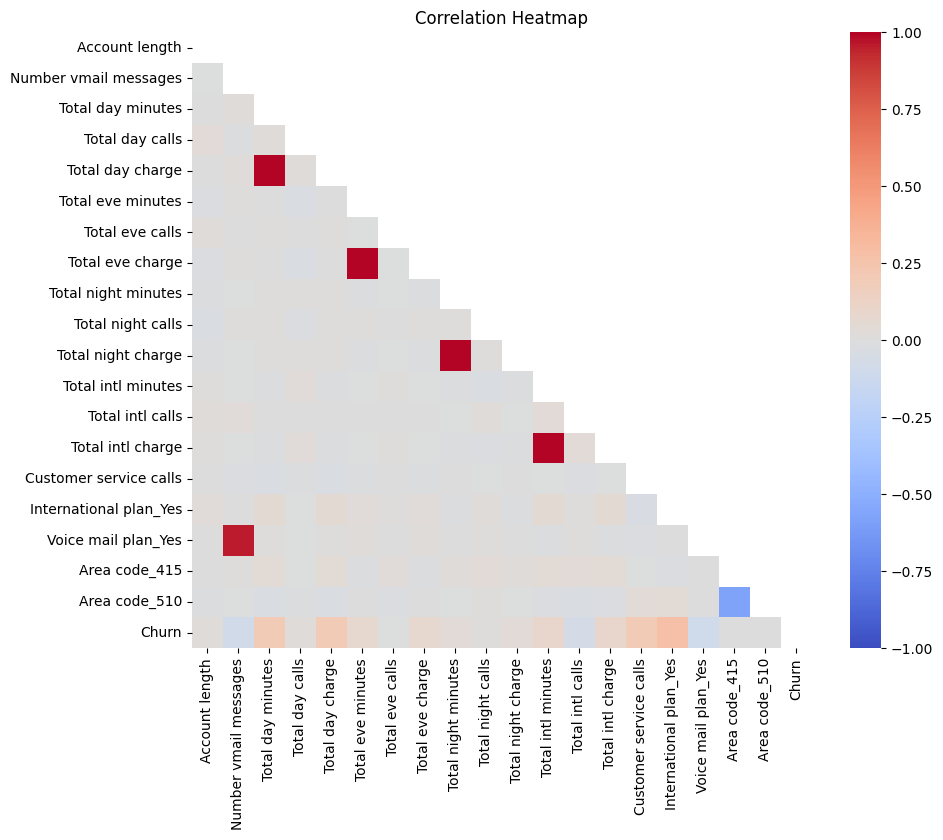

In [10]:
# === 2‑4 Numerical Features Correlation Heatmap ===
import numpy as np                     # add this line

corr = df_train[numeric_cols + ["Churn"]].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))  # show only lower triangle
sns.heatmap(
    corr,
    mask=mask,
    annot=False,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# === Imports and helper ===
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

# Feature matrix / target vector
X_train = df_train.drop("Churn", axis=1)
y_train = df_train["Churn"]
X_test  = df_test.drop("Churn", axis=1)
y_test  = df_test["Churn"]

# Identify numeric columns for scaling (uint8 are already 0/1)
num_cols = [c for c in X_train.columns if X_train[c].dtype != "uint8"]

# Common pre‑processor: scale numeric, keep one‑hot as‑is
preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(), num_cols)],
    remainder="passthrough"
)

# Helper to evaluate a fitted model on test set
def evaluate(model_name, fitted_pipe):
    y_pred = fitted_pipe.predict(X_test)
    y_prob = fitted_pipe.predict_proba(X_test)[:, 1]

    return {
        "model":      model_name,
        "accuracy":   accuracy_score(y_test, y_pred),
        "precision":  precision_score(y_test, y_pred, zero_division=0),
        "recall":     recall_score(y_test, y_pred, zero_division=0),
        "f1":         f1_score(y_test, y_pred, zero_division=0),
        "roc_auc":    roc_auc_score(y_test, y_prob)
    }


In [12]:
results = []

# 1) Standard Logistic Regression
log_reg = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])
log_reg.fit(X_train, y_train)
results.append(evaluate("Logistic", log_reg))

# 2) Ridge (L2) – smaller C means stronger regularization
ridge = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(
        penalty="l2", C=1.0, max_iter=1000, class_weight="balanced"
    ))
])
ridge.fit(X_train, y_train)
results.append(evaluate("Ridge (L2)", ridge))

# 3) Lasso (L1) – liblinear solver supports L1
lasso = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(
        penalty="l1", solver="liblinear",
        C=0.5, max_iter=1000, class_weight="balanced"
    ))
])
lasso.fit(X_train, y_train)
results.append(evaluate("Lasso (L1)", lasso))


In [13]:
# 4) Decision Tree
dt = Pipeline([
    ("prep", preprocess),      # scaling not necessary but harmless
    ("clf", DecisionTreeClassifier(
        max_depth=None, class_weight="balanced", random_state=42
    ))
])
dt.fit(X_train, y_train)
results.append(evaluate("Decision Tree", dt))

# 5) Random Forest
rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=200, max_depth=None,
        class_weight="balanced", random_state=42
    ))
])
rf.fit(X_train, y_train)
results.append(evaluate("Random Forest", rf))

# 6) Gradient Boosting
gb = Pipeline([
    ("prep", preprocess),
    ("clf", GradientBoostingClassifier(random_state=42))
])
gb.fit(X_train, y_train)
results.append(evaluate("Gradient Boosting", gb))


In [14]:
# === 4‑1 Metrics table ===
metrics_df = pd.DataFrame(results).set_index("model")
display(metrics_df.round(3))

# === 4‑2 Feature importance / coefficients (top 10) ===
def show_top_features(pipe, model_name, top_n=10):
    clf = pipe.named_steps["clf"]

    if hasattr(clf, "coef_"):          # Logistic family
        importances = clf.coef_[0]
    elif hasattr(clf, "feature_importances_"):  # Tree models
        importances = clf.feature_importances_
    else:
        print(f"{model_name} has no built‑in feature importance.")
        return

    feature_names = pipe["prep"].get_feature_names_out()
    top_idx = np.argsort(np.abs(importances))[::-1][:top_n]
    print(f"\nTop {top_n} features for {model_name}:")
    for i in top_idx:
        print(f"{feature_names[i]:<25} {importances[i]:.4f}")

# Example: display for the best model (replace with your choice)
show_top_features(rf, "Random Forest")


,accuracy,precision,recall,f1,roc_auc
model,,,,,
Logistic,0.769,0.355,0.758,0.483,0.831
Ridge (L2),0.769,0.355,0.758,0.483,0.831
Lasso (L1),0.772,0.358,0.758,0.486,0.830
Decision Tree,0.921,0.719,0.726,0.723,0.840
Random Forest,0.949,0.969,0.663,0.788,0.919
Gradient Boosting,0.951,0.931,0.705,0.802,0.925



Top 10 features for Random Forest:
num__Customer service calls 0.1444
num__Total day charge     0.1255
num__Total day minutes    0.1245
num__International plan_Yes 0.0928
num__Total eve minutes    0.0589
num__Total eve charge     0.0529
num__Total intl minutes   0.0437
num__Total intl charge    0.0427
num__Total intl calls     0.0423
num__Total night charge   0.0415
